In [1]:
import pandas as pd

""" Loading & Preprocessing Dataset """
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = ''.join(char for char in text if char.isalnum() or char.isspace())
        return text
    else:
        return '' 
    
df = pd.read_csv('../data/Philips_Employee_Reviews_from_AmbitionBox.csv')
df['Likes'] = df['Likes'].apply(preprocess_text)
df['Dislikes'] = df['Dislikes'].apply(preprocess_text)
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['Sentiment'] = df['Overall_rating'].apply(lambda x: sentiment_mapping['positive'] if x > 3 else sentiment_mapping['neutral'] if x == 3 else sentiment_mapping['negative'])
df['Text'] = df['Likes'] + ' ' + df['Dislikes']

df.to_csv('../data/preprocessed_data.csv', index=False)

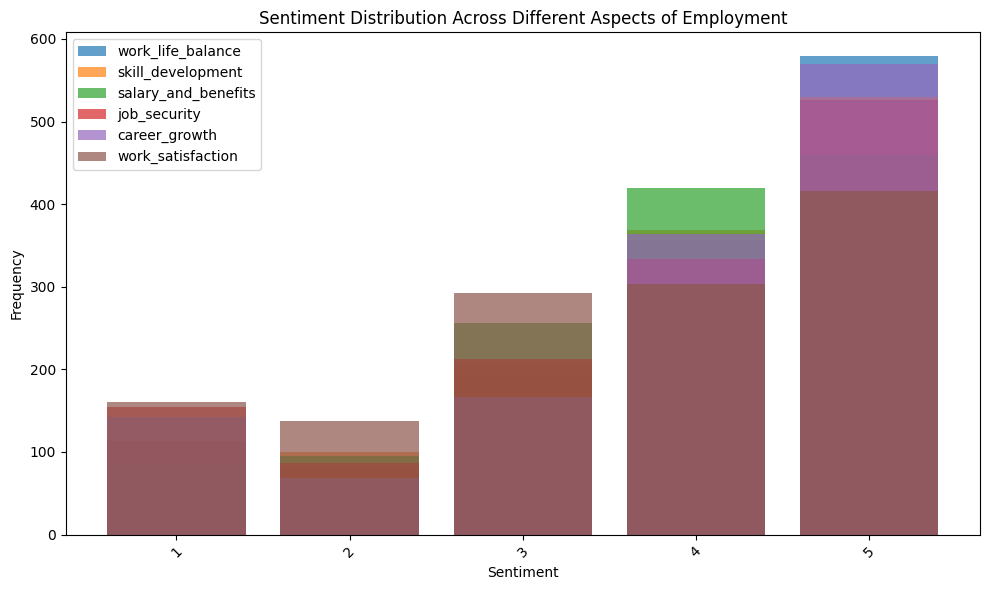

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

""" Dataset Exploration: Distribution of sentiment across different aspects of employment """

sentiment_aspects = ['work_life_balance', 'skill_development', 'salary_and_benefits', 'job_security', 'career_growth', 'work_satisfaction']

sentiment_distribution = {}
for aspect in sentiment_aspects:
    sentiment_distribution[aspect] = Counter(df[aspect])

plt.figure(figsize=(10, 6))
for aspect, counts in sentiment_distribution.items():
    labels, values = zip(*counts.items())
    plt.bar(labels, values, alpha=0.7, label=aspect)
plt.title('Sentiment Distribution Across Different Aspects of Employment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

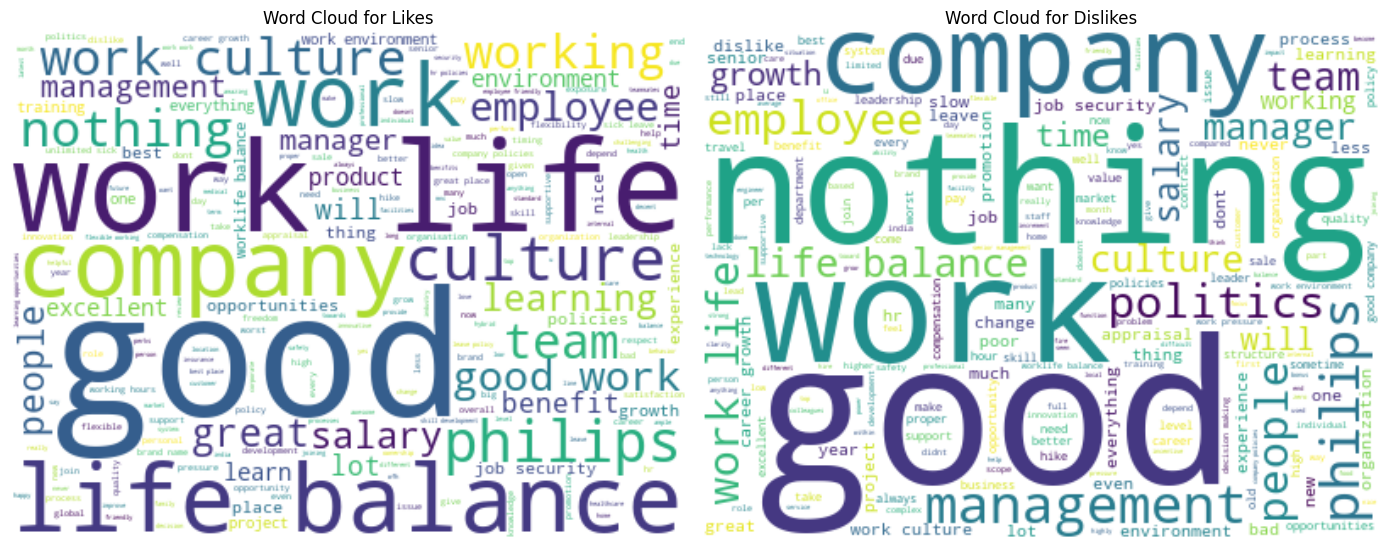

In [3]:
from wordcloud import WordCloud

""" Dataset Exploration: Identifying patterns and trends in text data"""

plt.figure(figsize=(14, 8))

text_likes = ' '.join(df['Likes'].dropna())
wordcloud_likes = WordCloud(width=400, height=300, background_color='white').generate(text_likes)
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_likes, interpolation='bilinear')
plt.title('Word Cloud for Likes')
plt.axis('off')

text_dislikes = ' '.join(df['Dislikes'].dropna())
wordcloud_dislikes = WordCloud(width=400, height=300, background_color='white').generate(text_dislikes)
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_dislikes, interpolation='bilinear')
plt.title('Word Cloud for Dislikes')
plt.axis('off')

plt.tight_layout()
plt.show()